### Importing Libraries

In [21]:
!pip install matplotlib --quiet
!pip install beautifulsoup4 --quiet

In [22]:
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup, Comment

In [23]:
main_url='https://indianbloggers.org/'

In [31]:
result = requests.get(main_url).text

In [49]:
#initalizing an empty dictionary that would be written as Pandas Dataframe and then CSV

d = {
    'title':[],
    'links':[]
}

In [33]:
#initializing blog hosting category

cat = {
    'blogspot':0,
    'wordpress':0,
    'others':0
}

In [45]:
soup = BeautifulSoup(result, 'html.parser')

print(soup.prettify()[:1000])   # prettify() makes the HTML more readable

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="top indian bloggers, popular indian blogs, india, blogging" name="keywords">
   <meta content="Directory of most popular blogs in India. You can meet some of the best Indian Bloggers here and even add your own blog to the bloggers directory." name="description">
    <title>
     Best Indian Blogs - Directory of Most Popular Blogs in India
    </title>
    <meta content="The Best Indian Bloggers" property="og:title">
     <meta content="website" property="og:type"/>
     <meta content="https://indianbloggers.org/" property="og:url"/>
     <meta content="http://img.labnol.org/files/di.png" property="og:image"/>
     <meta content="The Best Indian Bloggers" property="og:site_name"/>
     <meta content="500808182" property="fb:admins"/>
     <meta content="India Blogs is a frequen

In [35]:
for link in soup.find_all('a',):
    if len(link.text.strip()) > 1 and bool(re.match('^http',link['href'])) and not bool(re.search('indianbloggers|twitter|facebook',link['href'])):
        d['title'].append(link.text)
        d['links'].append(link['href'])
        
        #finding the blog hosting type
        if re.search('blogspot',link['href']):
            cat['blogspot']+=1
        elif re.search('wordpress',link['href']):
            cat['wordpress']+=1
        else:
            cat['others']+=1
            
        #d['len'].append(len(link.text.strip()))
    
blog_list = pd.DataFrame(d).set_index('title')


In [36]:
print(blog_list.head())

                                            links
title                                            
Amit Agarwal               http://www.labnol.org/
Jyotsna Kamat  http://www.kamat.com/jyotsna/blog/
Amit Varma             http://www.indiauncut.com/
Sidin Vadukut              http://www.whatay.com/
Hawkeye           http://hawkeyeview.blogspot.in/


In [37]:
blog_list.to_csv('blog_list.csv', encoding='utf-8')

In [38]:
print(str(len(blog_list.index))+' rows written')

363 rows written


In [39]:
print(cat)

{'blogspot': 106, 'wordpress': 49, 'others': 208}


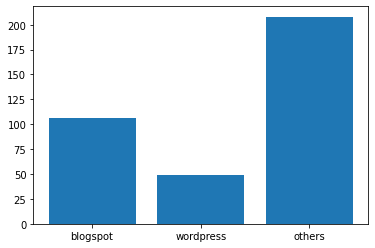

In [41]:
#plotting the blog hosting type 

plt.bar(range(len(cat)), cat.values(), align='center')
plt.xticks(range(len(cat)), cat.keys())

plt.show()